In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib
# import joblib
import cv2
import os
import torch 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import random
import math
import sys
sys.path.append('../../')

#import pretrainedmodels
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

from gated import *
# from resnet_gated_without_skip import *
# from resnet_gated import *
from resnet import *
from train import train, test
from dataset import *

In [2]:
# !pip install pretrainedmodels

In [3]:
#device = torch.device("cpu")
device = torch.device("cuda")
dtype = torch.float

BATCH_SIZE = 64

In [4]:
image_paths = list(paths.list_images('../../data/101_ObjectCategories'))
data = []
labels = []
for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]
    if label == 'BACKGROUND_Google':
        continue
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
data = np.array(data)
labels = np.array(labels)

/home/beomgon/anaconda3/envs/pytorch_retina/lib/python3.7/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


In [5]:
len(set(labels))

101

In [6]:
# one hot encode
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(f"Total number of classes: {len(lb.classes_)}")


Total number of classes: 101


In [7]:
# divide the data into train, validation, and test set
(x_train, x_val , y_train, y_val) = train_test_split(data, labels, 
                                                    test_size=0.3,  
                                                    stratify=labels,
                                                    random_state=42)

(x_val, x_test, y_val, y_test) = train_test_split(x_val, y_val, 
                                                    test_size=0.65, 
                                                    random_state=42)
print(f"x_train examples: {x_train.shape}\nx_test examples: {x_test.shape}\nx_val examples: {x_val.shape}")

x_train examples: (6073,)
x_test examples: (1693,)
x_val examples: (911,)


In [8]:
np.argmax(y_val[:20], axis=-1)

array([98,  3, 65, 52,  0,  1, 71, 72,  3,  3, 23,  3,  1, 55,  1, 11, 17,
       40, 90, 53])

In [9]:
train_data = ImageDataset(x_train, y_train, train_transform)
val_data = ImageDataset(x_val, y_val, val_transform)
test_data = ImageDataset(x_test, y_test, val_transform)

# dataloaders
trainloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
valloader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
testloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [10]:
# model.eval()

dilation [False, False, False]
stride 1
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
downsample
stride 2
ReLU()
ReLU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0563, Train Acc: 24.17
Val Loss: 0.0552, Val Acc: 29.20
Epoch 2 of 25
Train Loss: 0.0479, Train Acc: 32.74
Val Loss: 0.0478, Val Acc: 37.76
Epoch 3 of 25
Train Loss: 0.0425, Train Acc: 38.86
Val Loss: 0.0436, Val Acc: 41.27
Epoch 4 of 25
Train Loss: 0.0375, Train Acc: 44.13
Val Loss: 0.0382, Val Acc: 46.87
Epoch 5 of 25
Train Loss: 0.0330, Train Acc: 49.98
Val Loss: 0.0339, Val Acc: 50.60
Epoch 6 of 25
Train Loss: 0.0290, Train Acc: 55.62
Val Loss: 0.0323, Val Acc: 52.69
Epoch 7 of 25
Train Loss: 0.0252, Train Acc: 60.96
Val Loss: 0.0312, Val Acc: 55.32
Epoch 8 of 25
Train Loss: 0.0215, Train Acc: 65.59
Val Loss: 0.0269, Val Acc: 59.60
Epoch 9 of 25
Train Loss: 0.0180, Train Acc: 71.05
V

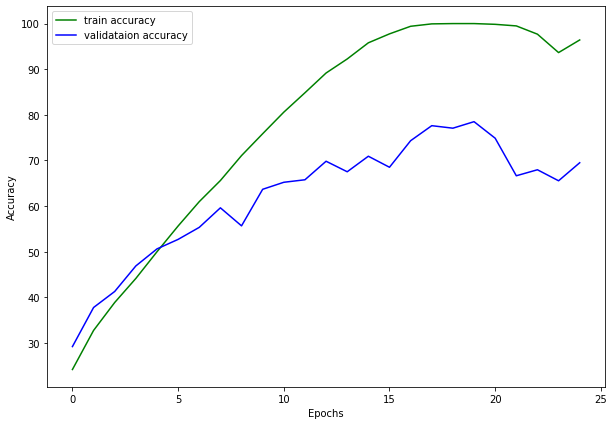

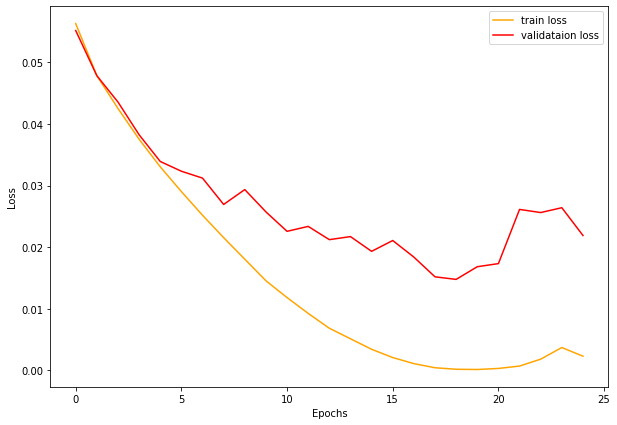

In [11]:
model = resnet18(pretrained=False, activation='relu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))

dilation [False, False, False]
stride 1
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
downsample
stride 2
GELU()
GELU()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0005
    weight_decay: 0
)
Epoch 1 of 25
Train Loss: 0.0566, Train Acc: 23.73
Val Loss: 0.0550, Val Acc: 31.39
Epoch 2 of 25
Train Loss: 0.0483, Train Acc: 32.88
Val Loss: 0.0496, Val Acc: 38.31
Epoch 3 of 25
Train Loss: 0.0432, Train Acc: 37.95
Val Loss: 0.0522, Val Acc: 31.39
Epoch 4 of 25
Train Loss: 0.0390, Train Acc: 41.96
Val Loss: 0.0434, Val Acc: 41.71
Epoch 5 of 25
Train Loss: 0.0352, Train Acc: 46.55
Val Loss: 0.0385, Val Acc: 45.55
Epoch 6 of 25
Train Loss: 0.0308, Train Acc: 51.89
Val Loss: 0.0354, Val Acc: 50.16
Epoch 7 of 25
Train Loss: 0.0272, Train Acc: 57.50
Val Loss: 0.0339, Val Acc: 51.59
Epoch 8 of 25
Train Loss: 0.0233, Train Acc: 62.80
Val Loss: 0.0298, Val Acc: 57.85
Epoch 9 of 25
Train Loss: 0.0199, Train Acc: 67.68
V

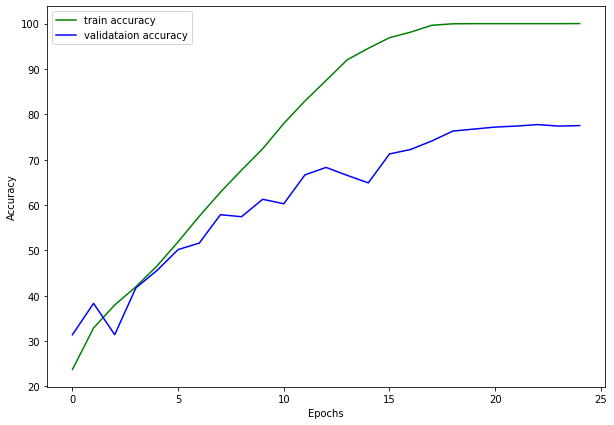

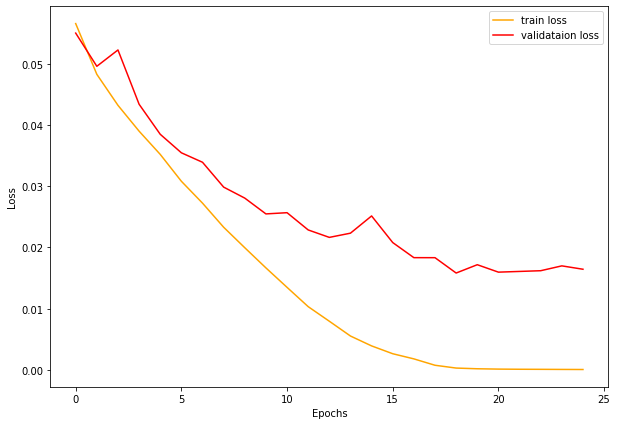

In [12]:
model = resnet18(pretrained=False, activation='gelu').to(device)
train(model, trainloader, valloader)
correct, total = test(model, testloader)
print('Accuracy of the network on test images: %0.3f %%' % (100 * correct / total))